# Fenômeno de Runge

### Prof. Pedro Peixoto <ppeixoto@usp.br>

Maio 2022


In [17]:
import numpy as np
import sys
import matplotlib.pyplot as plt


In [20]:
def lagrange(x, y, x_samples):
    y_samples = np.zeros_like(x_samples)
    for xi, yi in zip(x, y):
        y_samples += yi*np.prod([(x_samples - xj)/(xi - xj)
            for xj in x if xi!=xj], axis=0)
    return y_samples

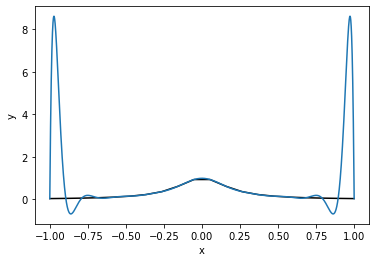

n= 20   Max Error= 8.579052045885195


In [21]:
#Runge function
f = lambda x: 1/(1 + 25*x**2)
n= 20

#Dados
x = np.linspace(-1, 1, n)

# Locais onde quero calcular (interpolar) -
#   vou colocar mais pontos para ver como se conporta entre os pontos dados
x_full = np.linspace(-1, 1, 10000)

y_full = lagrange(x, f(x), x_full)

plt.plot(x, f(x), "k")
plt.plot(x_full, y_full)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("n=", n, "  Max Error=", np.max(np.abs(y_full-f(x_full))))

In [22]:
# https://notebook.community/tclaudioe/Scientific-Computing/SC1/07_Polynomial_Interpolation_1D

def Chebyshev(xmin,xmax,n=5):
    # This function calculates the n Chebyshev points and plots or returns them depending on ax
    ns = np.arange(1,n+1)
    x = np.cos((2*ns-1)*np.pi/(2*n))
    y = np.sin((2*ns-1)*np.pi/(2*n))
    plt.figure(figsize=(10,5))
    plt.ylim(-0.1,1.1)
    plt.xlim(-1.1,1.1)
    plt.plot(np.cos(np.linspace(0,np.pi)),np.sin(np.linspace(0,np.pi)),'k-')
    plt.plot([-2,2],[0,0],'k-')
    plt.plot([0,0],[-1,2],'k-')
    for i in range(len(y)):
        plt.plot([x[i],x[i]],[0,y[i]],'r-')
        plt.plot([0,x[i]],[0,y[i]],'r-')
    plt.plot(x,[0]*len(x),'bo',label='Chebyshev points')
    plt.plot(x,y,'ro')
    plt.xlabel('$x$')
    plt.title('n = '+str(n))
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

def Chebyshev_points(xmin,xmax,n):
    ns = np.arange(1,n+1)
    x = np.cos((2*ns-1)*np.pi/(2*n))
    return (xmin+xmax)/2 + (xmax-xmin)*x/2


In [ ]:
from ipywidgets import interact, fixed, IntSlider

interact(Chebyshev,xmin=fixed(-1),xmax=fixed(1),n=(2,50))


interactive(children=(IntSlider(value=5, description='n', max=50, min=2), Output()), _dom_classes=('widget-int…

<function __main__.Chebyshev(xmin, xmax, n=5)>

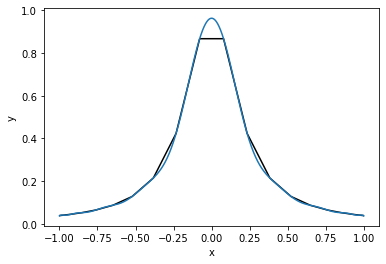

n= 20   Max Error= 0.03759024429779412


In [ ]:


#Runge function
f = lambda x: 1/(1 + 25*x**2)
n= 20

#Dados
x = Chebyshev_points(-1,1,n)

# Locais onde quero calcular (interpolar) -
#   vou colocar mais pontos para ver como se conporta entre os pontos dados
x_full = np.linspace(-1, 1, 10000)

y_full = lagrange(x, f(x), x_full)

plt.plot(x, f(x), "k")
plt.plot(x_full, y_full)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("n=", n, "  Max Error=", np.max(np.abs(y_full-f(x_full))))